In [1]:
!nvidia

/bin/bash: nvidia: command not found


In [3]:
import numpy as no
import tensorflow as tf
from tensorflow import keras 
from keras.datasets import cifar10


In [4]:
#load the data set 
(X_train,y_train),(X_test,y_test)=cifar10.load_data()


In [5]:
print("there are {} train images and {} test images".format(X_train.shape[0],X_test.shape[0]))

there are 50000 train images and 10000 test images


In [46]:
#one hot encoding rhe labels 
num_classes=10
from keras.utils import np_utils
y_train=np_utils.to_categorical(y_train,num_classes)
y_test=np_utils.to_categorical(y_test,num_classes)
import matplotlib.pyplot as plt


(50000, 32, 32, 3)


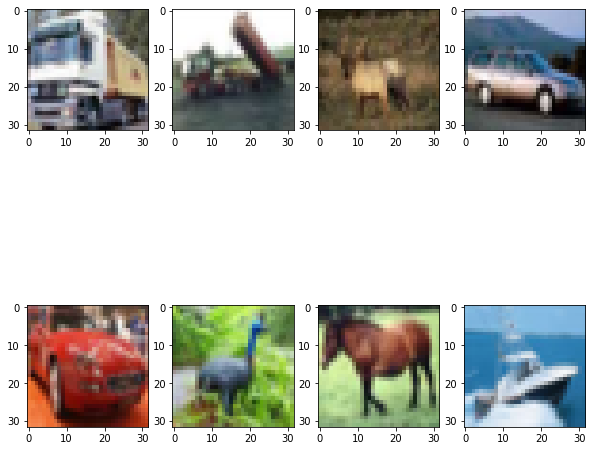

In [47]:
fig=plt.figure(figsize=(10,10))
for i in range(1,9):
  img=X_train[i]
  fig.add_subplot(2,4,i)
  plt.imshow(img)

print(X_train.shape)

In [48]:
#import the necessary libraries 
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten,GlobalAveragePooling2D

#building a Sequential model 
model =Sequential()


In [49]:
model.add(Conv2D(32,(3,3),activation='relu',input_shape=X_train.shape[1:]))
model.add(MaxPool2D(2,2))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(GlobalAveragePooling2D())
model.add(Dense(10,activation="softmax"))


In [55]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
X_train_scratch = X_train.astype("float32")/255
X_test_scratch = X_test.astype("float32")/255

In [56]:
#create a checkpointer 

from keras.callbacks import ModelCheckpoint
checkpointer=ModelCheckpoint(filepath='model.best.hdf5',verbose=True,save_best_only=True)

In [57]:
#Fitting the model on the train data and labels.
model.fit(X_train, y_train, batch_size=32, epochs=10, 
          verbose=1, callbacks=[checkpointer], validation_split=0.2, shuffle=True)

Epoch 1/10
1250/1250 [==============================] - 6s 4ms/step - loss: 0.1508 - accuracy: 0.7053 - val_loss: 0.1750 - val_accuracy: 0.6535

Epoch 00001: val_loss improved from inf to 0.17501, saving model to model.best.hdf5
Epoch 2/10
1250/1250 [==============================] - 6s 4ms/step - loss: 0.1471 - accuracy: 0.7104 - val_loss: 0.1784 - val_accuracy: 0.6434

Epoch 00002: val_loss did not improve from 0.17501
Epoch 3/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.1424 - accuracy: 0.7216 - val_loss: 0.1739 - val_accuracy: 0.6490

Epoch 00003: val_loss improved from 0.17501 to 0.17395, saving model to model.best.hdf5
Epoch 4/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.1390 - accuracy: 0.7303 - val_loss: 0.1771 - val_accuracy: 0.6498

Epoch 00004: val_loss did not improve from 0.17395
Epoch 5/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.1365 - accuracy: 0.7350 - val_loss: 0.1737 - val_accuracy: 0.6563

E

In [58]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1816 - accuracy: 0.6468


[0.18164515495300293, 0.6467999815940857]

In [60]:
from keras.applications.resnet50 import ResNet50,preprocess_input

In [62]:
model=ResNet50(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
#Reshaping the testing data
X_test_new = np.array([imresize(X_test[i], (200, 200, 3)) for i in range(0, len(X_test))]).astype('float32')

#Preprocessing the data, so that it can be fed to the pre-trained ResNet50 model.
resnet_test_input = preprocess_input(X_test_new)

#Creating bottleneck features for the testing data
test_features = model.predict(resnet_test_input)

#Saving the bottleneck features
np.savez('resnet_features_test', features=test_features)

In [ ]:
model = Sequential()
model.add(GlobalAveragePooling2D(input_shape=train_features.shape[1:]))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))
model.summary()

In [5]:
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

In [79]:
model.fit(train_features, y_train, batch_size=32, epochs=10,
          validation_split=0.2, callbacks=[checkpointer], verbose=1, shuffle=True)

In [ ]:
#Evaluate the model on the test data
score  = model.evaluate(test_features, y_test)

#Accuracy on test data
print('Accuracy on the Test Images: ', score[1])